# DataScience - weather csv and flight csv  NYC Flight13 dataset

Question 1<br>
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.<br>
(a) How many flights were there from NYC airports to Seattle in 2013?<br>
(b) How many airlines fly from NYC to Seattle?<br>
(c) How many unique air planes fly from NYC to Seattle?<br>
(d) What is the average arrival delay for flights from NYC to Seattle?<br>
(e) What proportion of flights to Seattle come from each NYC airport?<br>


Question 2<br>
Flights are often delayed. Consider the following questions exploring delay patterns.<br>
(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?<br>
(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?<br>
(c) Are there any seasonal patterns in departure delays for flights from NYC?<br>
(d) On average, how do departure delays vary over the course of a day?<br>

Question 3<br>
Which flight departing NYC in 2013 flew the fastest?<br>


Question 4<br>
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?<br>

Question 5<br>
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.<br>

Question 6<br>
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.
data uses NYC Flight13 dataset<br>

Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

In [95]:
import pandas as pd

flights_df = pd.read_csv('flights.csv')
print flights_df.shape

(336776, 17)


In [96]:
print flights_df.columns

Index([u'Unnamed: 0', u'year', u'month', u'day', u'dep_time', u'dep_delay',
       u'arr_time', u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin',
       u'dest', u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')


In [97]:
del flights_df["Unnamed: 0"]

In [98]:
print flights_df.columns

Index([u'year', u'month', u'day', u'dep_time', u'dep_delay', u'arr_time',
       u'arr_delay', u'carrier', u'tailnum', u'flight', u'origin', u'dest',
       u'air_time', u'distance', u'hour', u'minute'],
      dtype='object')


In [99]:
print flights_df.dtypes

year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object


In [100]:
flights_df.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

# Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.<br>
(a) How many flights were there from NYC airports to Seattle in 2013?


In [101]:
JFK_flights = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='JFK')].count()['flight']
EWR_flights = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='EWR')].count()['flight']
LGA_flights = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='LGA')].count()['flight']
NYC_flights = JFK_flights+EWR_flights+LGA_flights
print 'There are ' + str(NYC_flights) + ' flights from NYC area to Seattle.'

There are 3923 flights from NYC area to Seattle.


(b) How many airlines fly from NYC to Seattle?

In [103]:
JFK_carriers = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='JFK')]['carrier'].unique()
EWR_carriers = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='EWR')]['carrier'].unique()
LGA_carriers = flights_df[(flights_df['dest']=='SEA') & (flights_df['origin']=='LGA')]['carrier'].unique()

JFK_carriers_string =  str(JFK_carriers)[1:-1]
EWR_carriers_string =  str(EWR_carriers)[1:-1]
LGA_carriers_string =  str(LGA_carriers)[1:-1]

print 'The airlines that fly from NYC to SEATTLE are ' + JFK_flights_string + ' ' +EWR_flights_string + LGA_flights_string

# 2nd iteration
airlines = flights_df[(flights_df["dest"]=="SEA")& ((flights_df["origin"]=="EWR") | (flights_df["origin"]=="JFK")| (flights_df["origin"]=="LGA"))]['carrier'].unique()
print str(airlines)[1:-1]

NameError: name 'JFK_flights_string' is not defined

(c) How many unique air planes fly from NYC to Seattle?

In [104]:
unique_flights_SEA = flights_df[(flights_df["dest"]=="SEA")& ((flights_df["origin"]=="EWR") | (flights_df["origin"]=="JFK")| (flights_df["origin"]=="LGA"))]['tailnum']

len(unique_flights_SEA.unique())

936

(d) What is the average arrival delay for flights from NYC to Seattle?


In [105]:
arrival_delay = flights_df[(flights_df['dest'] == 'SEA') & ((flights_df['origin']=='EWR') | (flights_df['origin']=='JFK') | (flights_df['origin']=='LGA'))]['arr_delay']
arrival_delay.mean()

-1.0990990990990992

(e) What proportion of flights to Seattle come from each NYC airport?

In [106]:
# print float(JFK_flights) /float(NYC_flights)  
# print float(EWR_flights) / float(NYC_flights)
# print float(LGA_flights) / float(NYC_flights)

print 'JFK flights {0:.2%}'.format((JFK_flights)/float(NYC_flights))
print 'EWR flights {0:.2%}'.format((EWR_flights)/float(NYC_flights))
print 'LGA flights {0:.2%}'.format((LGA_flights)/float(NYC_flights))


JFK flights 53.33%
EWR flights 46.67%
LGA flights 0.00%


# Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.<br>
(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?<br>
(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?<br>
(c) Are there any seasonal patterns in departure delays for flights from NYC?<br>
(d) On average, how do departure delays vary over the course of a day?<br>


# COMEBACK TO THIS PROBLEM DATE

In [107]:

# # Add date column to df, concatenating year/month/day
flights_df['date'] = pd.to_datetime(flights_df['year'] * 10000 + flights_df['month'] * 100 + flights_df['day'], format='%Y%m%d')

# # flights_df['date']
largest_avg_departure_delay = flights_df.groupby(['date'])
# largest_avg_departure_delay['dep_delay'].mean().max()\


# largest_avg_departure_delay['date']
dep_delay_flights = flights_df[flights_df['dep_delay'] > 0]
delayed = dep_delay_flights.sort_values('dep_delay', ascending = 0)
# delayed.groupby(['dep_delay'])['date'].max()
lrg_avg_dd = delayed.groupby(['dep_delay'])['date'].max()



In [108]:

# #combining the columns year, month & day to form a date
# flights_df["date"] = pd.to_datetime(flights_df["year"]*10000
#                                     +flights_df["month"]*100
#                                     +flights_df["day"],
#                                     format='%Y%m%d')
# #grouping by date
# datewise_flights_df = flights_df.groupby(["date"])

In [109]:
# print datewise_flights_df['arr_delay'].mean().max()

# print datewise_flights_df['dep_delay'].mean().max()

In [110]:

# # use .groupby() to aggregate data for each date, then use .mean() to calculate average delay time
# dep_delay = flights_df.groupby('date', as_index = False)['dep_delay'].mean()
# arr_delay = flights_df.groupby('date', as_index = False)['arr_delay'].mean()

# # print the rows that have maximum delay time for 2 new data frames
# print(dep_delay.ix[dep_delay['dep_delay'].idxmax()])
# print(arr_delay.ix[arr_delay['arr_delay'].idxmax()])


In [111]:

# using dep_delay_flights from before, group by date and aggregate by count
count_del_flights = dep_delay_flights.groupby('date').count()

# Filter for flights with a positive departure delay
dep_delay_flights = flights_df[flights_df['dep_delay'] > 0]
del_count = count_del_flights.sort_values('dep_delay', ascending = 0)

del_count['dep_delay']

date
2013-12-23    674
2013-03-08    653
2013-07-01    652
2013-06-25    649
2013-07-23    645
2013-05-24    621
2013-07-08    615
2013-12-17    608
2013-12-09    606
2013-08-09    602
2013-08-22    593
2013-06-26    591
2013-04-12    587
2013-12-19    584
2013-02-27    584
2013-12-22    583
2013-05-08    583
2013-12-18    580
2013-06-13    577
2013-08-08    571
2013-06-28    562
2013-04-19    557
2013-10-11    557
2013-08-13    554
2013-07-09    552
2013-07-11    551
2013-04-11    550
2013-05-09    549
2013-07-12    545
2013-07-03    543
             ... 
2013-01-29    193
2013-10-22    192
2013-08-31    192
2013-01-10    191
2013-11-28    191
2013-04-27    189
2013-01-19    186
2013-11-06    186
2013-03-30    185
2013-11-19    182
2013-09-01    181
2013-09-06    181
2013-09-05    180
2013-11-05    179
2013-10-01    179
2013-01-12    173
2013-11-16    167
2013-02-09    166
2013-10-02    164
2013-01-15    164
2013-05-26    162
2013-09-28    155
2013-09-24    154
2013-09-14    144
2013-

### (b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?

### (c) Are there any seasonal patterns in departure delays for flights from NYC?


In [112]:
average_montly_flight_delays = flights_df.groupby(['month'])['dep_delay'].mean()
average_montly_flight_delays

month
1     10.036665
2     10.816843
3     13.227076
4     13.938038
5     12.986859
6     20.846332
7     21.727787
8     12.611040
9      6.722476
10     6.243988
11     5.435362
12    16.576688
Name: dep_delay, dtype: float64

### (d) On average, how do departure delays vary over the course of a day?

In [113]:
flights_df.groupby(['hour'])['dep_delay'].mean()

hour
0.0     128.642452
1.0     207.049327
2.0     239.921875
3.0     304.727273
4.0      -5.554098
5.0      -4.355644
6.0      -1.520552
7.0       0.223289
8.0       1.091432
9.0       4.268295
10.0      5.548644
11.0      5.652309
12.0      7.601892
13.0      9.380639
14.0      8.090381
15.0     10.682049
16.0     13.621150
17.0     16.756593
18.0     18.664671
19.0     21.497342
20.0     28.266213
21.0     42.064964
22.0     68.190042
23.0     96.946865
24.0     64.862069
Name: dep_delay, dtype: float64

### Question 3
Which flight departing NYC in 2013 flew the fastest?<br>

In [200]:
# speed = dist/time

flights_df['speed'] = flights_df['distance'] / flights_df['air_time']

fastest_flight_df = flights_df.sort_values(by = 'speed', ascending=False)
# fastest_flight_df.max()

fastest_flight_df[['carrier', 'tailnum', 'flight', 'origin', 'dest', 'date', 'speed']].head(1)


,carrier,tailnum,flight,origin,dest,date,speed
216447,DL,N666DN,1499,LGA,ATL,2013-05-25,11.723077


### Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?


In [115]:
carrier_flight_dest_df = flights_df.groupby(['carrier', 'flight', 'dest', 'origin'], as_index=False).count()
carrier_flight_dest_df[carrier_flight_dest_df['date']==365][['carrier', 'flight', 'dest', 'origin']]

,carrier,flight,dest,origin
775,AA,59,SFO,JFK
783,AA,119,LAX,EWR
791,AA,181,LAX,JFK
912,AA,1357,SJU,JFK
922,AA,1611,MIA,LGA
1127,B6,219,CLT,JFK
1156,B6,359,BUR,JFK
1159,B6,371,FLL,LGA
1178,B6,431,SRQ,LGA
1252,B6,703,SJU,JFK


## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.

#### Which of the NYC airports is used most for long-distance flights?

In [116]:
flights_long_dist_df = flights_df.groupby('origin').mean()

print flights_long_dist_df['distance']

origin
EWR    1056.742790
JFK    1266.249077
LGA     779.835671
Name: distance, dtype: float64


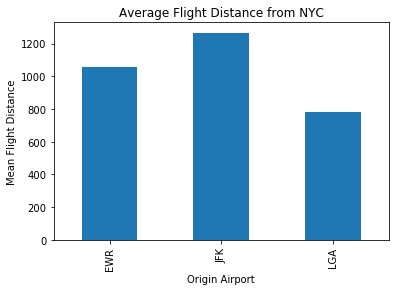

In [117]:
# Import and alias pyplot from matplotlib
import matplotlib.pyplot as plt

# Set plots to plot inline
%matplotlib inline 


flights_long_dist_df.distance.plot(kind = 'bar')
plt.xlabel('Origin Airport')
plt.ylabel('Mean Flight Distance')
plt.title(r'Average Flight Distance from NYC')




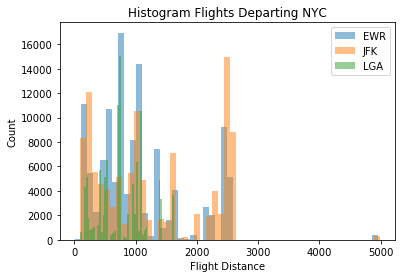

In [118]:
# Create a series containing distance for each of the origin airports by filtering on origin

flights_EWR = flights_df['distance'][flights_df['origin']== 'EWR']
flights_JFK = flights_df['distance'][flights_df['origin']== 'JFK']
flights_LGA = flights_df['distance'][flights_df['origin']== 'LGA']

# Plot a histogram for each of the above series, and overlay on same plot to see comparison
plt.hist(flights_EWR.values, 50, alpha=0.5, label='EWR')

plt.hist(flights_JFK.values, 50, alpha=0.5, label='JFK')

plt.hist(flights_LGA.values, 50, alpha=0.5, label='LGA')

# Add labels for clarity
plt.xlabel('Flight Distance')
plt.ylabel('Count')
plt.title(r'Histogram Flights Departing NYC')
plt.legend(loc='upper right')

### QUESTION: Which carrier airline has most frequency of arrival delay at the NYC airports and how does it compare with it's departure delay?

          carrier
arr_delay        
10             OO
97             HA
189            AS
258            YV
392            F9
1746           VX
1895           FL
5304           WN
6637           9E
7349           US
10706          AA
11693          MQ
16413          DL
22222          UA
23609          B6
24484          EV


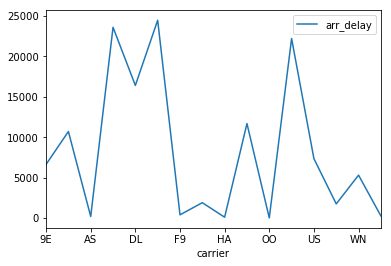

In [119]:
delayed_flights = flights_df[flights_df['arr_delay'] > 0]
delay_frequency = delayed_flights.groupby('carrier', as_index = False)['arr_delay'].count()
print delay_frequency.groupby(['arr_delay']).max()

delay_frequency = delay_frequency.set_index('carrier')
delay_frequency.plot()
plt.show()


          carrier
dep_delay        
9              OO
69             HA
226            AS
233            YV
341            F9
1654           FL
2225           VX
4775           US
6558           WN
7063           9E
8031           MQ
10162          AA
15241          DL
21445          B6
23139          EV
27261          UA


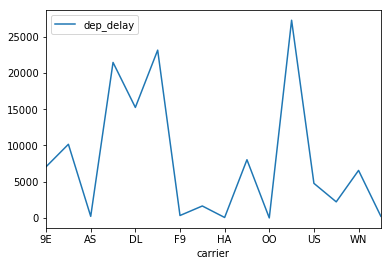

In [120]:
delayed_arr_flights = flights_df[flights_df['dep_delay'] > 0]
delayed_arr_frequency = delayed_arr_flights.groupby('carrier', as_index = False)['dep_delay'].count()
print delayed_arr_frequency.groupby(['dep_delay']).max()

delayed_arr_frequency = delayed_arr_frequency.set_index('carrier')
delayed_arr_frequency.plot()
plt.show()




## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.
data uses NYC Flight13 dataset<br>

In [140]:
# Load weather data into df
weather_df = pd.read_csv('weather.csv')


#deleting the "Unnamed: 0" column
del weather_df["Unnamed: 0"]


# View dataset datatypes
weather_df.head(12)

#grouping by month on mean values and selecting columns
delay_df = flights_df.groupby(["month"] , as_index = False).mean()[["month",
                                                                    "dep_delay",
                                                                    "arr_delay"]]
delay_df.head(12)

# View dataset datatypes
print weather_df.dtypes

# Look for missing date records
print weather_df[np.isnan(weather_df['month'])]



#Look for missing data records

,month,dep_delay,arr_delay
0,1,10.036665,6.129972
1,2,10.816843,5.613019
2,3,13.227076,5.807577
3,4,13.938038,11.176063
4,5,12.986859,3.521509
5,6,20.846332,16.481330
6,7,21.727787,16.711307
7,8,12.611040,6.040652
8,9,6.722476,-4.018364
9,10,6.243988,-0.167063


In [141]:
#grouping by month on mean values and selecting columns
conditions_df = weather_df.groupby(["month"], as_index = False).mean()[["month","temp", "dewp", 
                                                                        "humid", "wind_dir","wind_speed","wind_gust",
                                                                        "precip","pressure","visib"]]
conditions_df.head(12)

,month,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1.0,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2.0,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3.0,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4.0,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5.0,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046
5,6.0,73.249500,60.271500,66.507083,192.200000,9.401233,10.818751,0.007111,1013.587719,9.339583
6,7.0,80.614516,67.522661,66.655108,192.135922,9.002069,10.359401,0.002231,1016.555988,9.590390
7,8.0,74.460054,61.085081,65.577311,194.483734,7.493271,8.623106,0.003576,1016.679063,9.613360
8,9.0,67.366750,53.684750,63.972542,190.286533,7.991528,9.196490,0.001306,1016.959524,9.710764
9,10.0,59.690488,46.948780,65.150542,148.442281,8.156816,9.386701,0.000203,1018.108793,9.470528


In [142]:
#merging the flight & weather conditions data based on month
mean_weather_df = pd.merge(delay_df, conditions_df, on = "month")
mean_weather_df.head(12)


,month,dep_delay,arr_delay,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,10.036665,6.129972,35.563176,22.701777,61.948385,214.801097,9.681731,11.141542,0.003634,1021.016794,8.567779
1,2,10.816843,5.613019,34.132906,21.705663,62.918152,203.424658,12.183519,14.020550,0.004113,1016.275170,8.615127
2,3,13.227076,5.807577,40.043311,24.913136,57.591346,235.247934,11.507800,13.242946,0.002598,1013.457607,9.286003
3,4,13.938038,11.176063,52.901000,34.625000,54.403236,169.614286,9.541884,10.980609,0.001472,1020.420916,9.544792
4,5,12.986859,3.521509,63.103710,49.001774,63.758589,176.731572,8.298299,9.549517,0.003710,1018.464899,8.964046
5,6,20.846332,16.481330,73.249500,60.271500,66.507083,192.200000,9.401233,10.818751,0.007111,1013.587719,9.339583
6,7,21.727787,16.711307,80.614516,67.522661,66.655108,192.135922,9.002069,10.359401,0.002231,1016.555988,9.590390
7,8,12.611040,6.040652,74.460054,61.085081,65.577311,194.483734,7.493271,8.623106,0.003576,1016.679063,9.613360
8,9,6.722476,-4.018364,67.366750,53.684750,63.972542,190.286533,7.991528,9.196490,0.001306,1016.959524,9.710764
9,10,6.243988,-0.167063,59.690488,46.948780,65.150542,148.442281,8.156816,9.386701,0.000203,1018.108793,9.470528


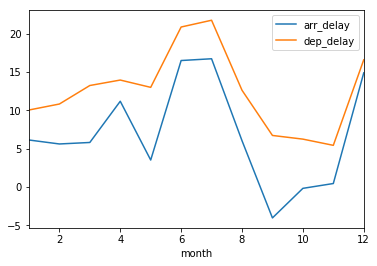

In [143]:

#checking the arrival & departure delay patter for the year
mean_weather_df.plot(x = "month", y =["arr_delay","dep_delay"])

In [144]:
#checking correlation
mean_weather_df.corr()["arr_delay"]["dep_delay"]

0.93367550245983544

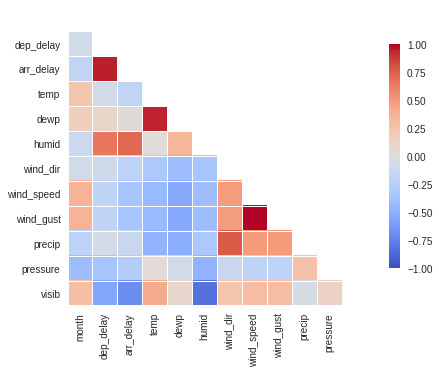

In [160]:
import seaborn as sns
# sns.set()
# df = sns.load_dataset("iris")
# sns.pairplot(df, hue="species", size=2.5)


import seaborn.linearmodels as sbs
sbs.corrplot(mean_weather_df.pct_change(), annot=False, diag_names=False)


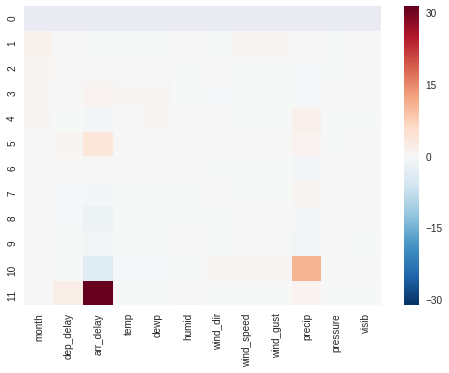

In [161]:
sns.heatmap(mean_weather_df.pct_change(), annot=False)

We can see from the correlation matrix that the "dep_delay" & "arr_delay" have some degree of correlation with "humid" and "dewp". Therefore, plotting these datapoints across the year below.

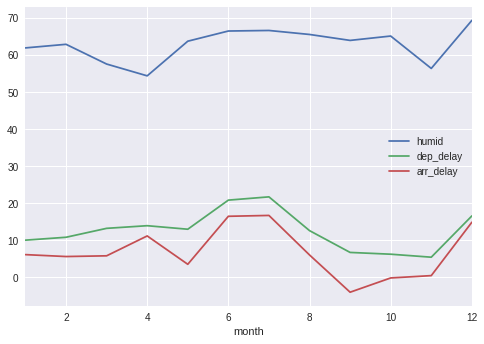

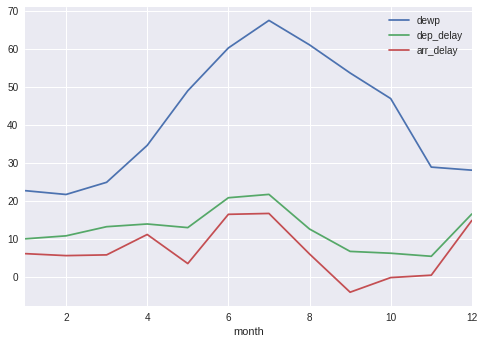

In [162]:
#plotting delay Vs humid & dewp for all months
mean_weather_df.plot(x = "month", y =["humid","dep_delay","arr_delay"])
mean_weather_df.plot(x = "month", y =["dewp","dep_delay","arr_delay"])

We can see that there is an upsurge in both delays after May up until the beginning of September. We can observe a corresponding upsurge during the same time for humidity & dew point. Infact , dew point shows a spike. Overall the humidity & dew point tend to follow a similar pattern like that of the delays, which is also evident from the correlation value.

In [164]:
# merge 2 datasets on joined date_hour column
flights_df['date_time'] = pd.to_datetime(flights_df[['year', 'month', 'day', 'hour']])
weather_df['date_time'] = pd.to_datetime(weather_df[['year', 'month', 'day', 'hour']])
new_df = flights_df.merge(weather_df,on='date_time')
# new_df.head(10)

,year_x,month_x,day_x,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,hour_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013,1,1,600.0,0.0,851.0,-7.0,B6,N595JB,371,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
1,2013,1,1,600.0,0.0,837.0,12.0,MQ,N542MQ,4650,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
2,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,343,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
3,2013,1,1,602.0,-8.0,812.0,-8.0,DL,N971DL,1919,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
4,2013,1,1,602.0,-3.0,821.0,16.0,MQ,N730MQ,4401,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
5,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,1895,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,2013,1,1,606.0,-4.0,837.0,-8.0,DL,N3739P,1743,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
7,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,1077,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
8,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,3768,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
9,2013,1,1,611.0,11.0,945.0,14.0,UA,N532UA,303,...,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0


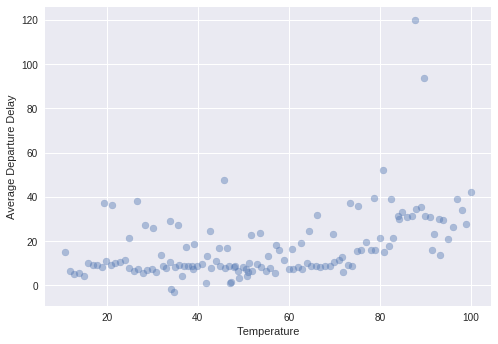

In [165]:
# Temperature vs Delay
# aggregate average departure delay by temperature
temp_delay = new_df.groupby('temp', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes temperature as predictor, and departure delay as response
plt.xlabel("Temperature")
plt.ylabel("Average Departure Delay")
plt.scatter(temp_delay.temp, temp_delay.dep_delay, alpha=0.4)

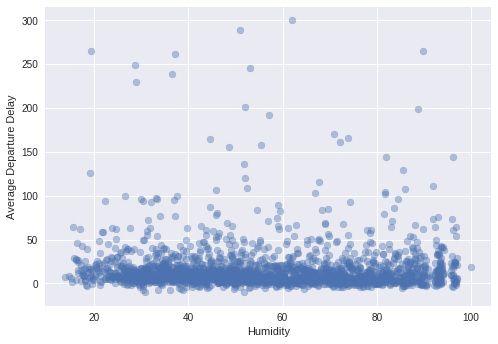

In [173]:
#Humidity vs Delay

# aggregate average departure delay by humidity
humid_delay = new_df.groupby('humid', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes humidity as predictor, and departure delay as response
plt.xlabel("Humidity")
plt.ylabel("Average Departure Delay")
plt.scatter(humid_delay.humid, humid_delay.dep_delay, alpha=0.4)

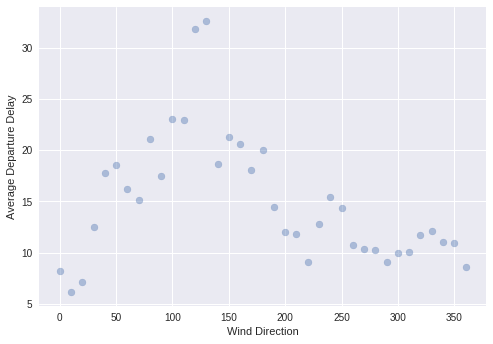

In [174]:
#Wind Direction vs Delay

# aggregate average departure delay by wind direction 
dir_delay = new_df.groupby('wind_dir', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind direction as predictor, and departure delay as response
plt.xlabel("Wind Direction")
plt.ylabel("Average Departure Delay")
plt.scatter(dir_delay.wind_dir, dir_delay.dep_delay, alpha=0.4)

(-3, 45)

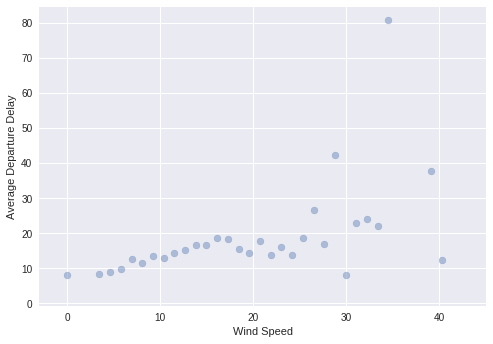

In [175]:
#Wind Speed vs Delay:

# aggregate average departure delay by wind speed 
speed_delay = new_df.groupby('wind_speed', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind speed as predictor, and departure delay as response
plt.xlabel("Wind Speed")
plt.ylabel("Average Departure Delay")
plt.scatter(speed_delay.wind_speed, speed_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,45)

(-3, 45)

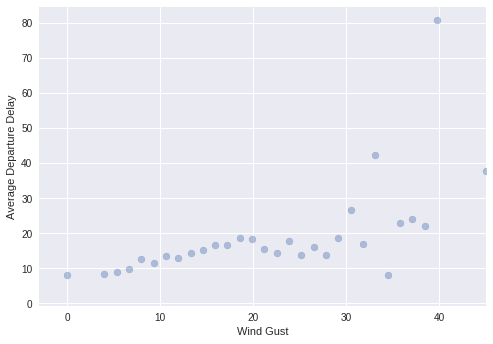

In [177]:
# aggregate average departure delay by wind gust
gust_delay = new_df.groupby('wind_gust', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes wind gust as predictor, and departure delay as response
plt.xlabel("Wind Gust")
plt.ylabel("Average Departure Delay")
plt.scatter(gust_delay.wind_gust, gust_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-3,45)

(-15, 130)

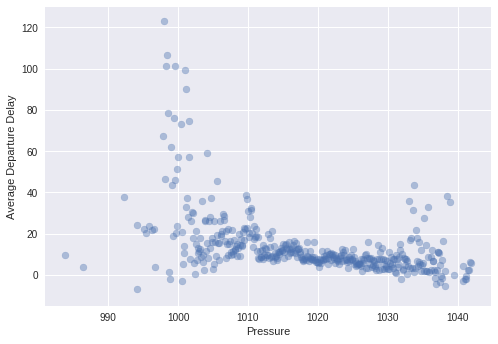

In [179]:
# Pressure vs Delay

# aggregate average departure delay by pressure
pre_delay = new_df.groupby('pressure', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes the pressure as predictor, and departure delay as response
plt.xlabel("Pressure")
plt.ylabel("Average Departure Delay")
plt.scatter(pre_delay.pressure, pre_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.ylim(-15,130)

(-0.01, 0.5)

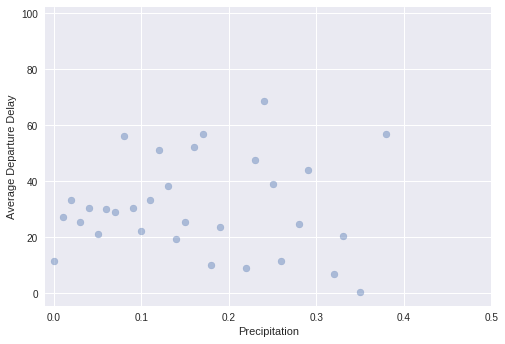

In [181]:
# Precipitation vs Delay

# aggregate average departure delay by precipitation
precip_delay = new_df.groupby('precip', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes the precipitation as predictor, and departure delay as response
plt.xlabel("Precipitation")
plt.ylabel("Average Departure Delay")
plt.scatter(precip_delay.precip, precip_delay.dep_delay, alpha=0.4)

# filter out out-liers
plt.xlim(-0.01,0.5)

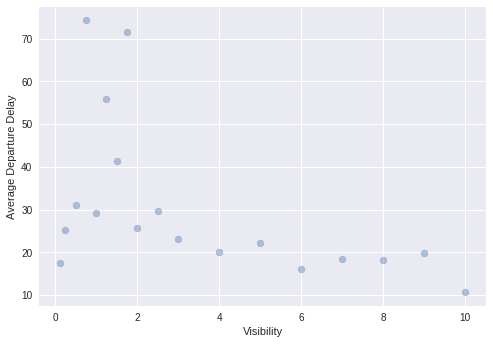

In [183]:
# Visibility vs Delay
# aggregate average departure delay by visibility
visib_delay = new_df.groupby('visib', as_index = False)['dep_delay'].mean()

# plot a scatter plot that takes visibility as predictor, and departure delay as response
plt.xlabel("Visibility")
plt.ylabel("Average Departure Delay")
plt.scatter(visib_delay.visib, visib_delay.dep_delay, alpha=0.4)

Interpretation: from the graphs we can see that overall, temperature, wind speed and wind gust are likely to have a positive effect on the average departure delay. Pressure and visibility are likely to have negative effect on the average departure delay time. wind direction has a positive effect when it's below about 130; and has a negative effect over that number. For humidity and precipitation, I don't see an obvious association from the graph.

In [184]:


weather_df= pd.read_csv('weather.csv')
flight_weather_df = pd.merge(flights_df,weather_df,on=['year','month','day','origin','hour'],how="inner")
fw1 = flight_weather_df.loc[(flight_weather_df.dep_delay > 0),["month","day",'hour',"dep_delay",'visib','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure']]
fw2 = fw1.groupby(['month'])['dep_delay','visib','temp','dewp','humid','wind_speed','wind_gust','precip','pressure'].mean()

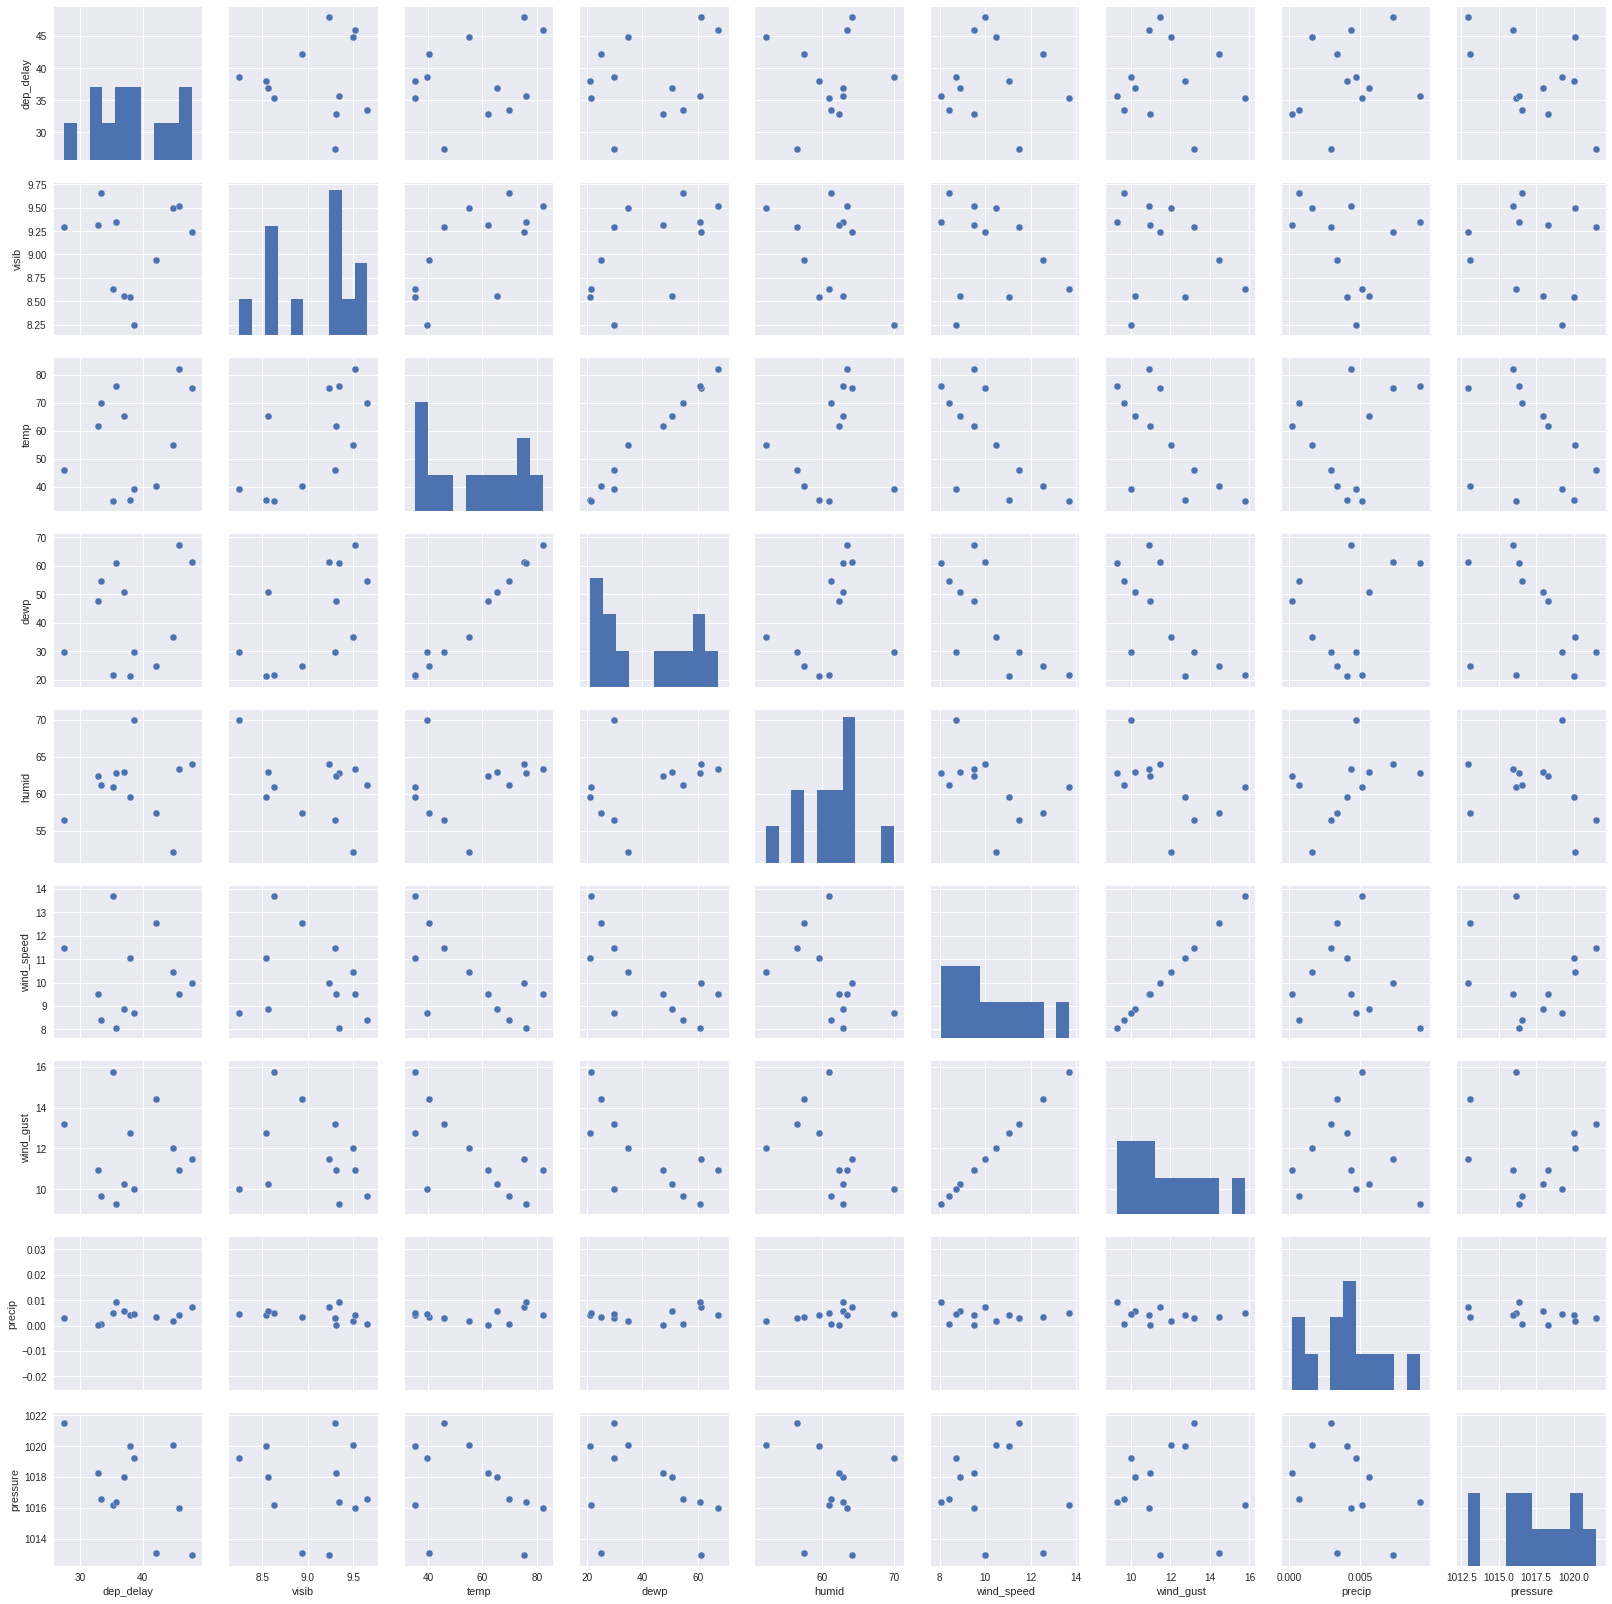

In [185]:

sns.pairplot(fw2)
sns.plt.show()

In [188]:
#merging above two data frames using variables year,month and day
merged = pd.merge(flights_df,weather_df, on=['year','month','day'],how='inner')

#slecting relevant columns from the merged dataset
merged = merged[['month','day','dep_delay','temp','humid','wind_dir']]
#discarding all NAs(missing values) from the merged dataset
merged.dropna(subset = ['dep_delay','temp','humid','wind_dir'])

#calculating average monthly temperature
avg_temp = pd.DataFrame(merged.groupby('month')['temp'].mean())
#calculating average monthly departure delay
avg_dep_delay = pd.DataFrame(merged.groupby('month')['dep_delay'].mean())

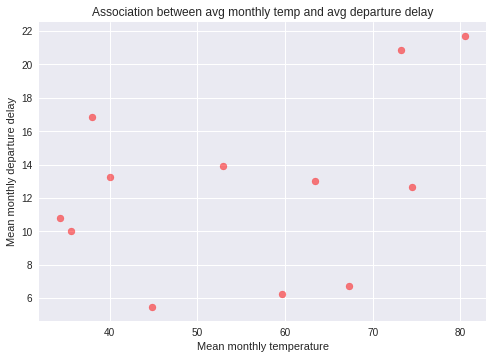

In [187]:

#assigning X as the mean monthly temperature
X = avg_temp['temp']
#assigning Y as the mean monthly departure delay
Y = avg_dep_delay['dep_delay']

#plotting a scatterplot of the values
plt.scatter(X,Y,alpha=0.5, color='red')
plt.xlabel('Mean monthly temperature')
plt.ylabel('Mean monthly departure delay')
plt.title('Association between avg monthly temp and avg departure delay')
plt.show()

Ans: Interpretation: The above scatterplot shows that with increase in average monthly temperature, the aveguare monthly depature of flights increase in an overall fashion, so summer months might account for more delays. While we see that, this could be unexpected as weather conditions like snow or rains during winter would have been more influential in delayed flights status. However, this observation is based off of only one year's (2013) worth of data.

In [203]:
# Used weather dataset from R package "nycflights13". Assumes file "weather.csv" is in working dir.
# Reference: https://cran.r-project.org/web/packages/nycflights13/index.html

import numpy as np

# Load weather data into df
weather_df = pd.read_csv('weather.csv')


# View dataset datatypes
print weather_df.dtypes

# Look for missing date records
print weather_df[np.isnan(weather_df['month'])]

# Remove missing date records so we can create datetime column 
for col in ['year', 'month', 'day']:
    weather_df = weather_df[weather_df[col].notnull()]

# Check to see if NaNs remain
print weather_df[np.isnan(weather_df['month'])]

# Create date column to join with flights_df date column

weather_df['date'] = pd.to_datetime(weather_df['year'] * 10000 + weather_df['month'].astype(int) * 100 + weather_df['day'].astype(int), format = '%Y%m%d')

# Merge flights_df and weather_df datasets for analysis. Use 'date' and 'hour' fields as keys
flight_weather = pd.merge(flights_df[flights_df['dep_delay'] > 0], weather_df, how='inner', on=['date', 'hour'])



Unnamed: 0      int64
origin         object
year            int64
month         float64
day           float64
hour          float64
temp          float64
dewp          float64
humid         float64
wind_dir      float64
wind_speed    float64
wind_gust     float64
precip        float64
pressure      float64
visib         float64
dtype: object
      Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  \
1630        1631    EWR  2013    NaN  NaN   NaN  44.96  17.96  33.55   

      wind_dir  wind_speed  wind_gust  precip  pressure  visib  
1630      20.0     3.45234   3.972884     0.0    1025.9   10.0  
Empty DataFrame
Columns: [Unnamed: 0, origin, year, month, day, hour, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib]
Index: []


In [204]:
# Look at wind_speed variable
flight_weather.wind_speed.describe()

# Eliminate high outlier record
flight_weather = flight_weather[flight_weather.wind_speed != flight_weather.wind_speed.max()]

# Re-check wind_speed variable 
flight_weather.wind_speed.describe()

count    128042.000000
mean          9.925997
std           5.508580
min           0.000000
25%           5.753900
50%           9.206240
75%          12.658580
max          40.277300
Name: wind_speed, dtype: float64

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     752.2
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           3.47e-45
Time:                        21:04:39   Log-Likelihood:                -359.49
No. Observations:                  90   AIC:                             721.0
Df Residuals:                      89   BIC:                             723.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.6232      0.023     27.425      0.0

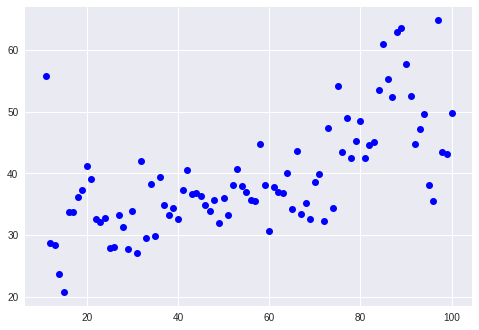

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     117.9
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           6.53e-12
Time:                        21:04:39   Log-Likelihood:                -136.60
No. Observations:                  31   AIC:                             275.2
Df Residuals:                      30   BIC:                             276.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.7503      0.161     10.856      0.0

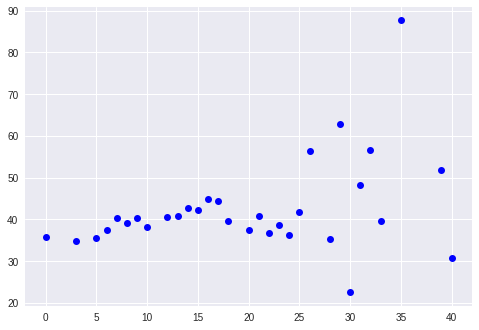

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     17.35
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           0.000230
Time:                        21:04:39   Log-Likelihood:                -178.35
No. Observations:                  32   AIC:                             358.7
Df Residuals:                      31   BIC:                             360.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           168.2159     40.387      4.165      0.0

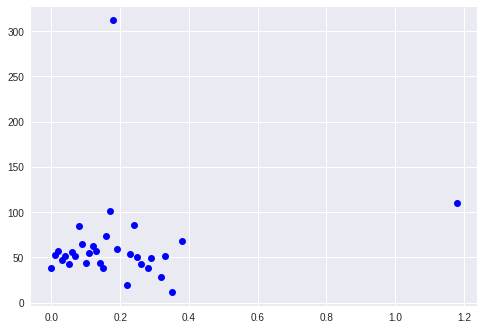

                            OLS Regression Results                            
Dep. Variable:              dep_delay   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     11.25
Date:                Wed, 09 Aug 2017   Prob (F-statistic):            0.00377
Time:                        21:04:39   Log-Likelihood:                -94.135
No. Observations:                  18   AIC:                             190.3
Df Residuals:                      17   BIC:                             191.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             7.8059      2.328      3.354      0.0

/home/cowboyuniverse/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


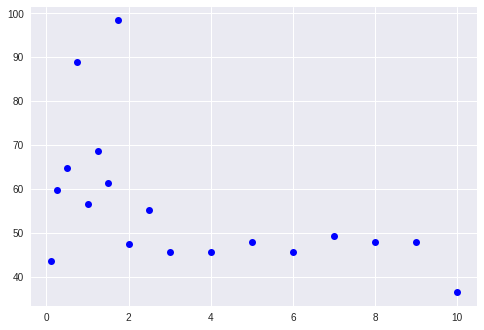

In [208]:
# Import StatsModels for OLS
import statsmodels.api as sm

# Round temp and wind_speed values so we can group on them
flight_weather.temp = np.round(flight_weather.temp, 0)
flight_weather.wind_speed = np.round(flight_weather.wind_speed, 0)

# For each of 4 variables of interest (temp, wind speed, precip, visib):
# group by the variable, average the dep_delay, run a OLS regression, scatterplot the results

for i in ['temp', 'wind_speed', 'precip', 'visib']:
    y = flight_weather.groupby(i)['dep_delay'].mean()
    x = y.index
    results = sm.OLS(y, x).fit()
    print results.summary()
    plt.figure()
    plt.plot(x,y,'bo')
    plt.show()

Weather appears to have an effect on the average length of flight delays. Looking at each of Temperature, Wind Speed, Precipitation, and Visibility (the four weather measurements I selected as most interesting to analyze), we see some relationships. Temperature has a strong relationship with departure delay length, evidenced by a visible linear pattern and a high R-squared value. In this simple linear model, temp explains 89% of the variation in dep_delay. Interestingly, the relationship is positive - higher temperature correlates with higher average delays. This is somewhat surprising, as this analyst would have expected cold temperatures to produce long delays. Wind_speed also appears to have an effect on delay length, though the pattern is not as strong. The R-squared is .79. Precipitation does not appear to be strongly related to departure delay. Visibility shows a relationship with departure delay. As expected, very low visibilities are associated with higher departure delays. For visibility >= 3 miles, there does not appear to be a significant effect on departure delay, as the line is relatively flat.